In [5]:
import matplotlib.pyplot as plt
import numpy as np
import os


In [1]:
def data_proc(file):
    # 读取数据文件
    data_blocks = []
    current_block = None

    # 逐行读取文件
    for line in file:
        line = line.strip()
        if line.startswith('#'):
            # 解析 m 和 n 值
            parts = line.split(',')
            m = int(parts[0].split('m=')[-1].strip())
            n = int(parts[1].split('n=')[-1].strip().split(')')[0])
            current_block = {"m": m, "n": n, "data": []}
            data_blocks.append(current_block)
        elif current_block is not None and line:
            # 提取前两列数据
            cols = list(map(float, line.split()))
            if len(cols) >= 2:
                current_block["data"].append((cols[0], cols[1]))
    return data_blocks

In [11]:
def plot_data(data_blocks,n_tht,n_num,name,enph_m_mode=None,save_path=None):
    # 绘图设置
    plt.figure(figsize=(8, 6))
    colors = plt.cm.tab20(np.linspace(0, 1, n_tht//2+1))  # 使用不同颜色
    alp = 0.9  # 透明度设置
    if enph_m_mode is not None:
        alp = 0.6
    for idx, block in enumerate(data_blocks):
        data = np.array(block["data"])
        x = data[:, 0]
        y = data[:, 1]
        n = block['n']
        iddx = int(idx % (n_tht/2+1))
        label = f"m={block['m']}, n={block['n']}"
        if n == n_num:#control n number
            # 对第一个数据块使用不同的线型
            if enph_m_mode is not None and block['m'] in enph_m_mode:
                plt.plot(x, y, 
                    color=colors[iddx], 
                    #marker='o', 
                    linestyle='-', 
                    linewidth=3,
                    markersize=6,
                    label=label)
            else:
                plt.plot(x, y, 
                        color=colors[iddx], 
                        #marker='o', 
                        linestyle='--', 
                        linewidth=1.5,
                        markersize=4,
                        label=label,
                        alpha=alp)
        else:
            continue
        
    # 添加图例和标签
    plt.legend(frameon=False, bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=14)
    plt.xlabel(fr'$\Psi_N$', fontsize=18)
    plt.ylabel(fr'Amplitude', fontsize=18)
    #plt.yscale('log')
    #plt.title(name, fontsize=16, pad=20, weight='bold')
    plt.grid(True, alpha=0.2)

    # 自动调整坐标轴范围
    plt.autoscale(enable=True, axis='both', tight=True)

    plt.tight_layout()
    if save_path != None:
        plt.savefig(save_path, dpi=600)
    plt.show()
    plt.close()

In [12]:
def data_anal(data_blocks,n_tht,n_num):
    # 统计数据块数量
    block_count = len(data_blocks)
    print(f"Total data blocks: {block_count}")

    # 统计每个数据块的 m 和 n 值
    for block in data_blocks:
        m = block["m"]
        n = block["n"]
        print(f"m={m}, n={n}")

    # 统计每个数据块的数据点数量
    for block in data_blocks:
        data_count = len(block["data"])
        print(f"Data points in m={block['m']}, n={block['n']}: {data_count}")
    
    plot_data(data_blocks,n_tht,n_num,'Strength vs Psi')

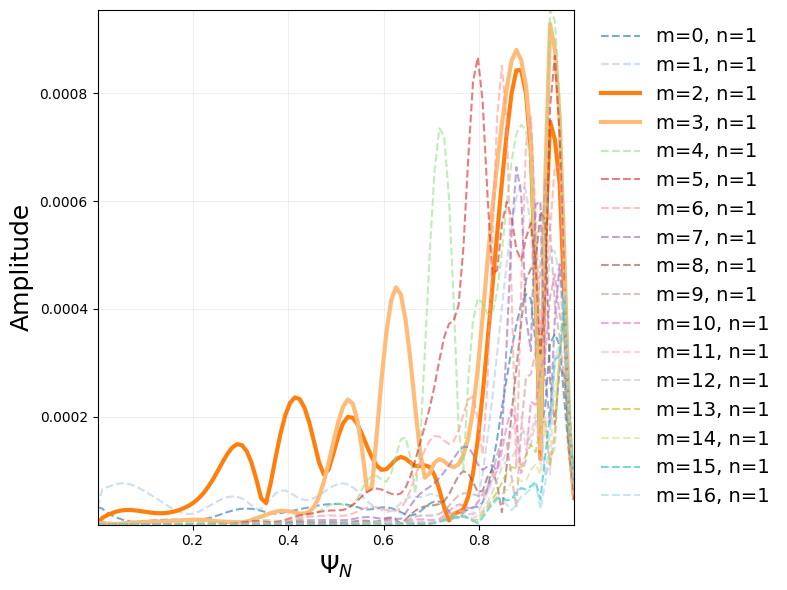

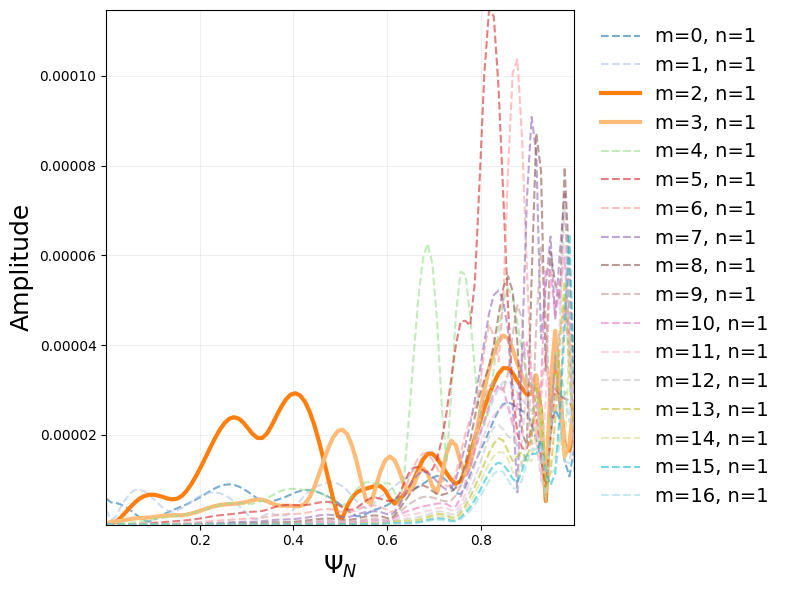

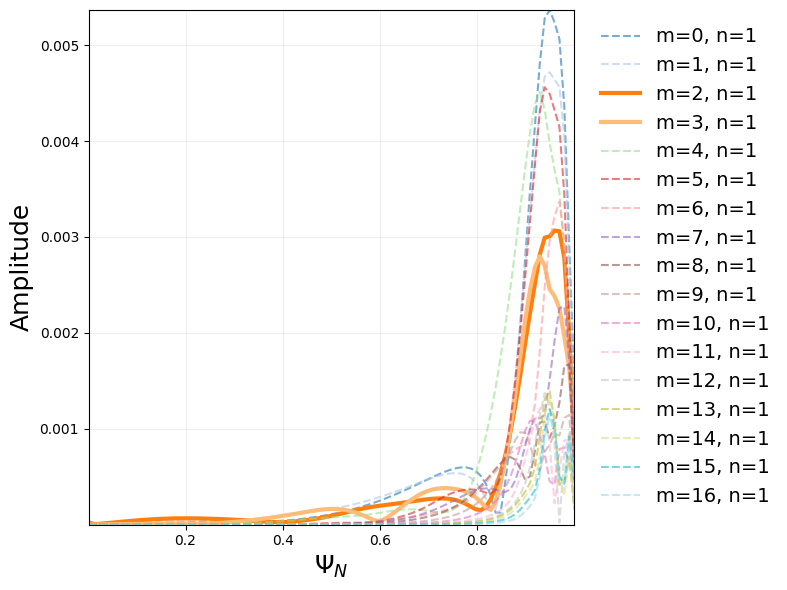

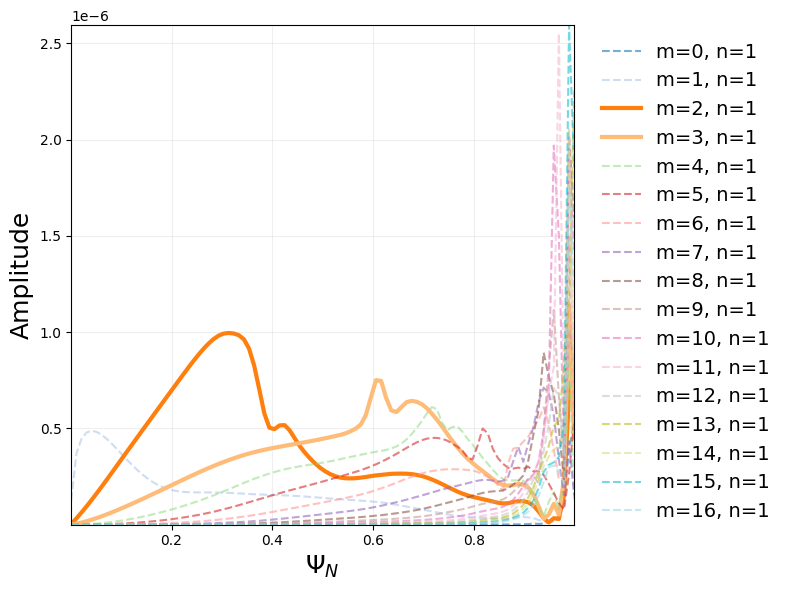

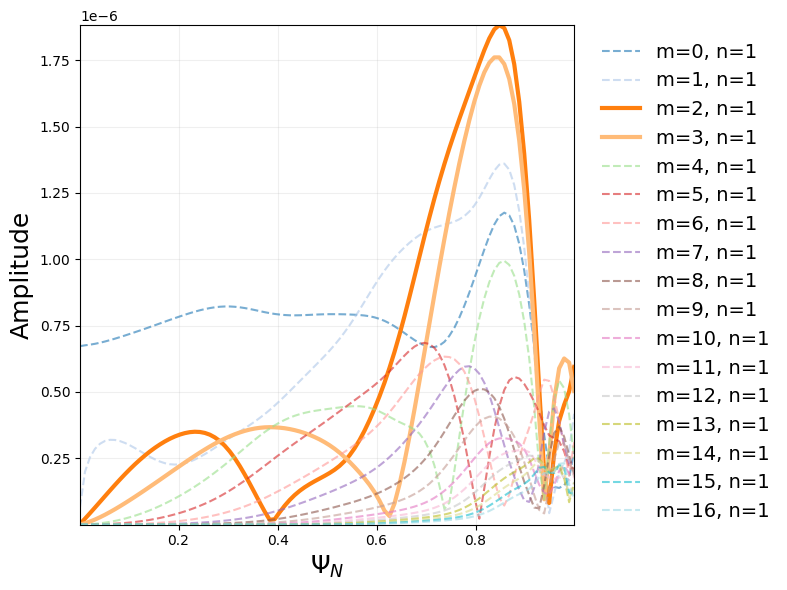

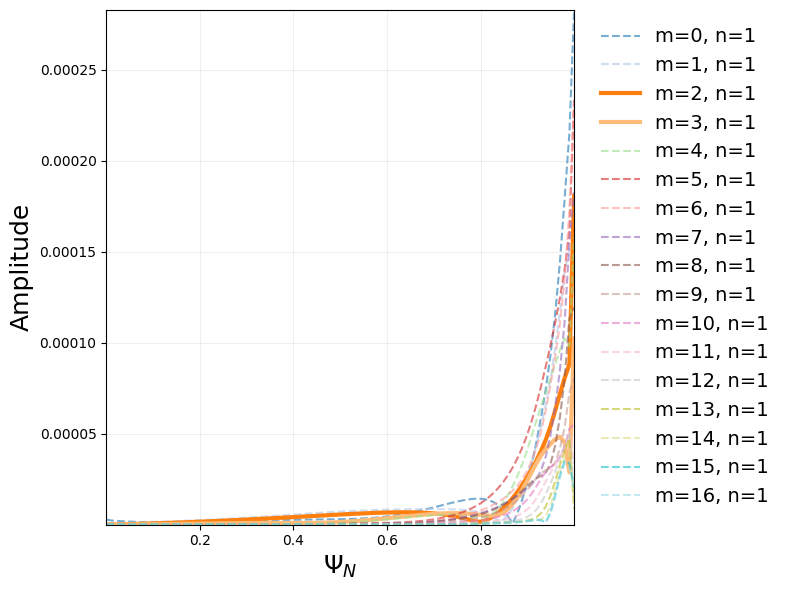

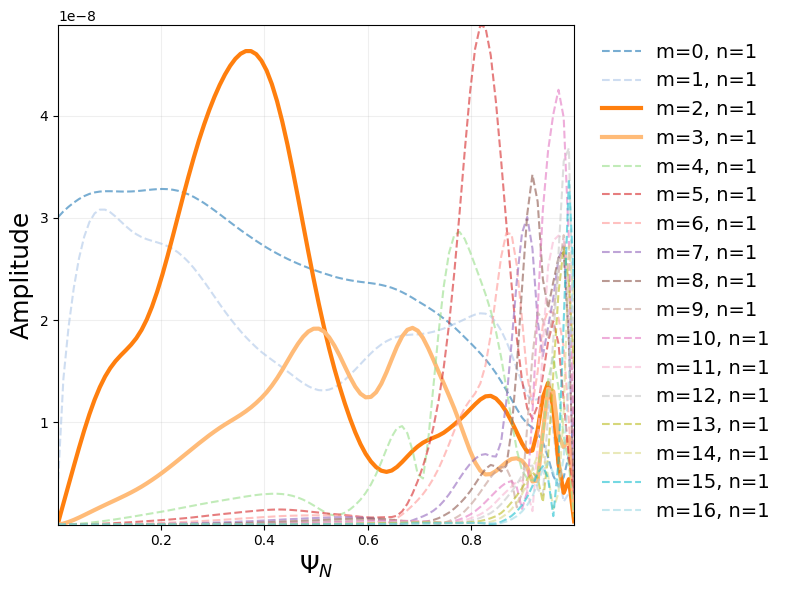

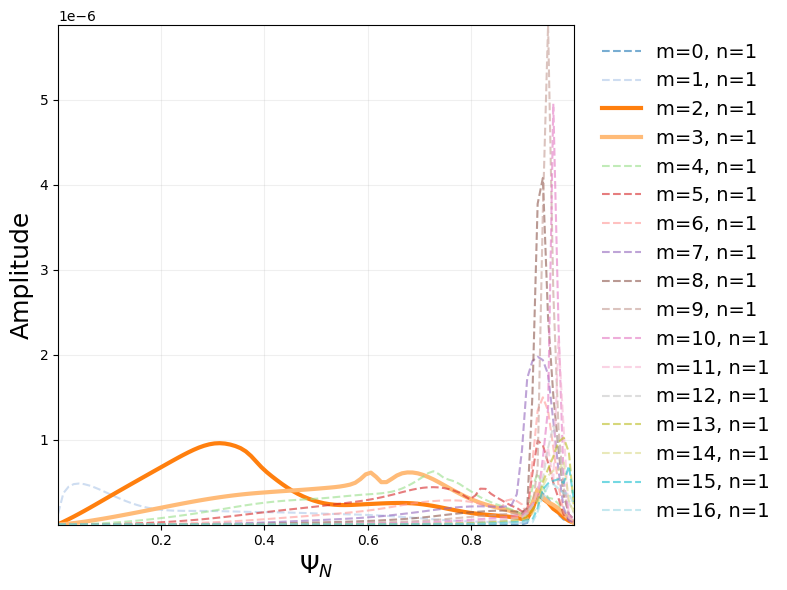

In [13]:
filename = os.listdir(r"/home/ac_desktop/syncfiles/fourier/145_2200/diag_fourier/")
#filename.sort()
#filename.sort(key = lambda x: float(x[-4:]), reverse=True)
filepath = r"/home/ac_desktop/syncfiles/fourier/145_2200/diag_fourier/" #4800 5600 6800
filepath1 = r"/home/ac_desktop/syncfiles/fourier/145_2200/img/"
n_num = 1
n_tht = 32
os.makedirs(os.path.join(filepath1,'n_num_' + str(n_num)), exist_ok=True)
for file in filename:
    source = open(os.path.join(filepath, file), "r")
    data_blocks = data_proc(source)
    source.close()
    name = file[0:-8]
    plot_data(data_blocks,n_tht,n_num,name,enph_m_mode=[2,3],save_path=os.path.join(filepath1,'n_num_' + str(n_num) , name + '.png'))
    
    